In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

In [5]:
data = datasets.load_digits()

In [6]:
data.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

In [8]:
data.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [9]:
data.target

array([0, 1, 2, ..., 8, 9, 8])

<Figure size 432x288 with 0 Axes>

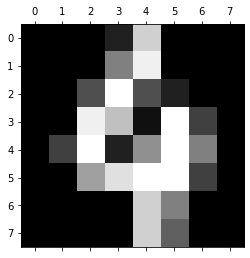

In [12]:
plt.gray()
plt.matshow(data.images[100])
plt.show()

In [13]:
data.target[100]

4

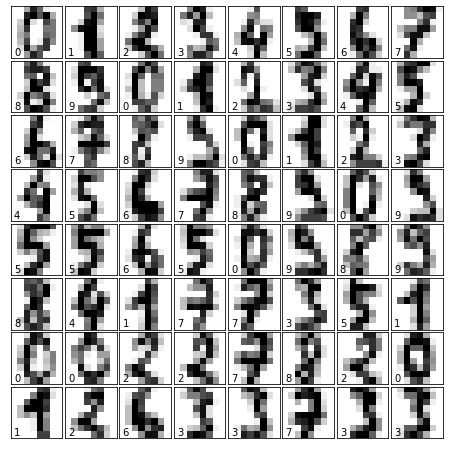

In [16]:
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(data.images[i], cmap=plt.cm.binary, interpolation='nearest')
    ax.text(0, 7, str(data.target[i]))

plt.show()

There are 10 numbers (0-9) so we need to find 10 clusters

In [43]:
model = KMeans(n_clusters=10, random_state=32)

In [44]:
model.fit(data.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=32, tol=0.0001, verbose=0)

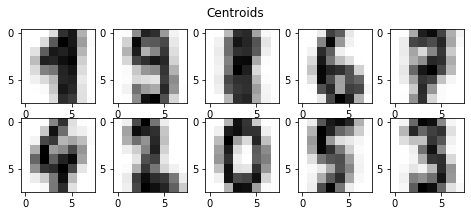

In [45]:
fig = plt.figure(figsize=(8, 3))
fig.suptitle('Centroids')
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i)
    ax.imshow(model.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)
    
plt.show()

In [51]:
inertias = []
random_state_range = 1000

for i in range(random_state_range):
    model = KMeans(n_clusters=10, random_state=i)
    model.fit(data.data)
    inertias.append(model.inertia_)

inertias

[1165177.713706214,
 1165289.8498464474,
 1165171.7210800247,
 1165203.4652550514,
 1165149.6948514238,
 1165750.0632659819,
 1165184.1751364868,
 1165175.3010148024,
 1165140.6607564185,
 1165178.2967972988,
 1165852.2710095015,
 1165168.6811133858,
 1165163.6116044815,
 1168364.5364961945,
 1165179.993015498,
 1165757.7254874778,
 1165457.8903192154,
 1165157.0248523287,
 1165153.361188673,
 1165213.3550111172,
 1165167.144787494,
 1165189.2886888275,
 1165760.3769053381,
 1165120.162285884,
 1165197.037610885,
 1165200.3372380072,
 1165203.5967283645,
 1165145.458659702,
 1165720.836852607,
 1165168.9747859484,
 1165152.3855353037,
 1165219.9910991231,
 1165222.04892833,
 1165149.081369062,
 1165233.0617489645,
 1165224.59996663,
 1165226.1815738406,
 1165161.439421099,
 1165196.0284057325,
 1165172.7517203772,
 1165131.386248541,
 1165126.0039680123,
 1165725.1115285032,
 1165237.7364075934,
 1165136.275977955,
 1165167.5085456357,
 1165185.166667455,
 1165309.1849734252,
 1165197.

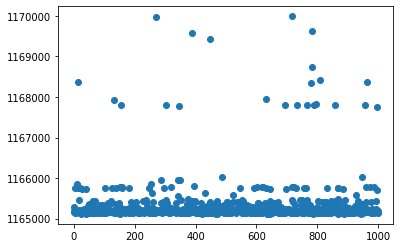

In [52]:
plt.scatter(x=range(random_state_range), y=inertias)
plt.show()

In [53]:
print(inertias.index(min(inertias)), min(inertias))

887 1165116.178134628
